# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid") # to add background to the plots
sns.set_palette("colorblind") # to add specific colors to the data visualization
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [3]:
#get dataframe shape
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0]) #print the number of rows
print('\nNumber of columns :', shape[1]) #print the number of columns


DataFrame Shape : (1898, 9)

Number of rows : 1898

Number of columns : 9


#### Observations:
The dataset provided comprises 1898 observations and 9 criteria under this dataset.

### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [4]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
We can see from this review of the dataset that:
- restaurant_name, cuisine_type, day_of_the_week and rating are categorical variable stored as strings, while
- order_id, customer_id, cost_of_the_order, food_preparation_time and delivery_time are quantitative variables stored as numbers (integers for all except the cost of the order).

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [5]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df = df.convert_dtypes() # the convert_dtypes function allows for the optimal conversion of different columns

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   Int64  
 1   customer_id            1898 non-null   Int64  
 2   restaurant_name        1898 non-null   string 
 3   cuisine_type           1898 non-null   string 
 4   cost_of_the_order      1898 non-null   Float64
 5   day_of_the_week        1898 non-null   string 
 6   rating                 1898 non-null   string 
 7   food_preparation_time  1898 non-null   Int64  
 8   delivery_time          1898 non-null   Int64  
dtypes: Float64(1), Int64(4), string(4)
memory usage: 142.8 KB


#### Observations:
We can notice that the category type indeed reduces the memory usage from 133.6 to 102.7 KB.

In [6]:
# we will also clean the data from the rating variable which is stored as a string
df['rating'].replace(['Not given','3','4','5'],[0,3,4,5],inplace=True)

# use info() to confirm the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   Int64  
 1   customer_id            1898 non-null   Int64  
 2   restaurant_name        1898 non-null   string 
 3   cuisine_type           1898 non-null   string 
 4   cost_of_the_order      1898 non-null   Float64
 5   day_of_the_week        1898 non-null   string 
 6   rating                 1898 non-null   int64  
 7   food_preparation_time  1898 non-null   Int64  
 8   delivery_time          1898 non-null   Int64  
dtypes: Float64(1), Int64(4), int64(1), string(3)
memory usage: 142.8 KB


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [7]:
# We will only look for the summary statistics for the quantitative variables 'cost_of_the_order', 
# 'food_preparation_time' and 'delivery_type'
# to do so, we will create a specific data frame by removing the non-necessary columns

dfs = df.drop(columns = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating'])
dfs.describe()

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000
mean,16.498851,27.371970,24.161749
std,7.483812,4.632481,4.972637
min,4.470000,20.000000,15.000000
25%,12.080000,23.000000,20.000000
50%,14.140000,27.000000,25.000000
75%,22.297500,31.000000,28.000000
max,35.410000,35.000000,33.000000


#### Observations:
- **Cost of the order:** We notice that the average price is 16.5 dollars, but this varies greatly between 4.47 and 35.41 dollars.
- **Food preparation time:** The average preparation time is 27 minutes, with a range of 20 to 35 minutes. The mean is at the center which means that this is a symmetric distribution.
- **Delivery time:** The average delivery time is 24 minutes, with a range of 15 to 33 minutes. The mean is at the center which means that this is a symmetric distribution.

### **Question 5:** How many orders are not rated? (0.5 mark)

In [8]:
# to determine this, we will identify in the dataframe the number of occurrences of the "Not given" 
# (which were converted to 0) response
(df['rating']==0).sum()

736

#### Observations:
Out of the 1898 orders in the dataframe, 736 orders do not include a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

*We will explore each variable separately and in a manner that takes into account the type of variable. The only variable that is not needed is order_id because it corresponds to each observation in the dataset. We will go through each variable in their order in the dataset.*

#### restaurant_name

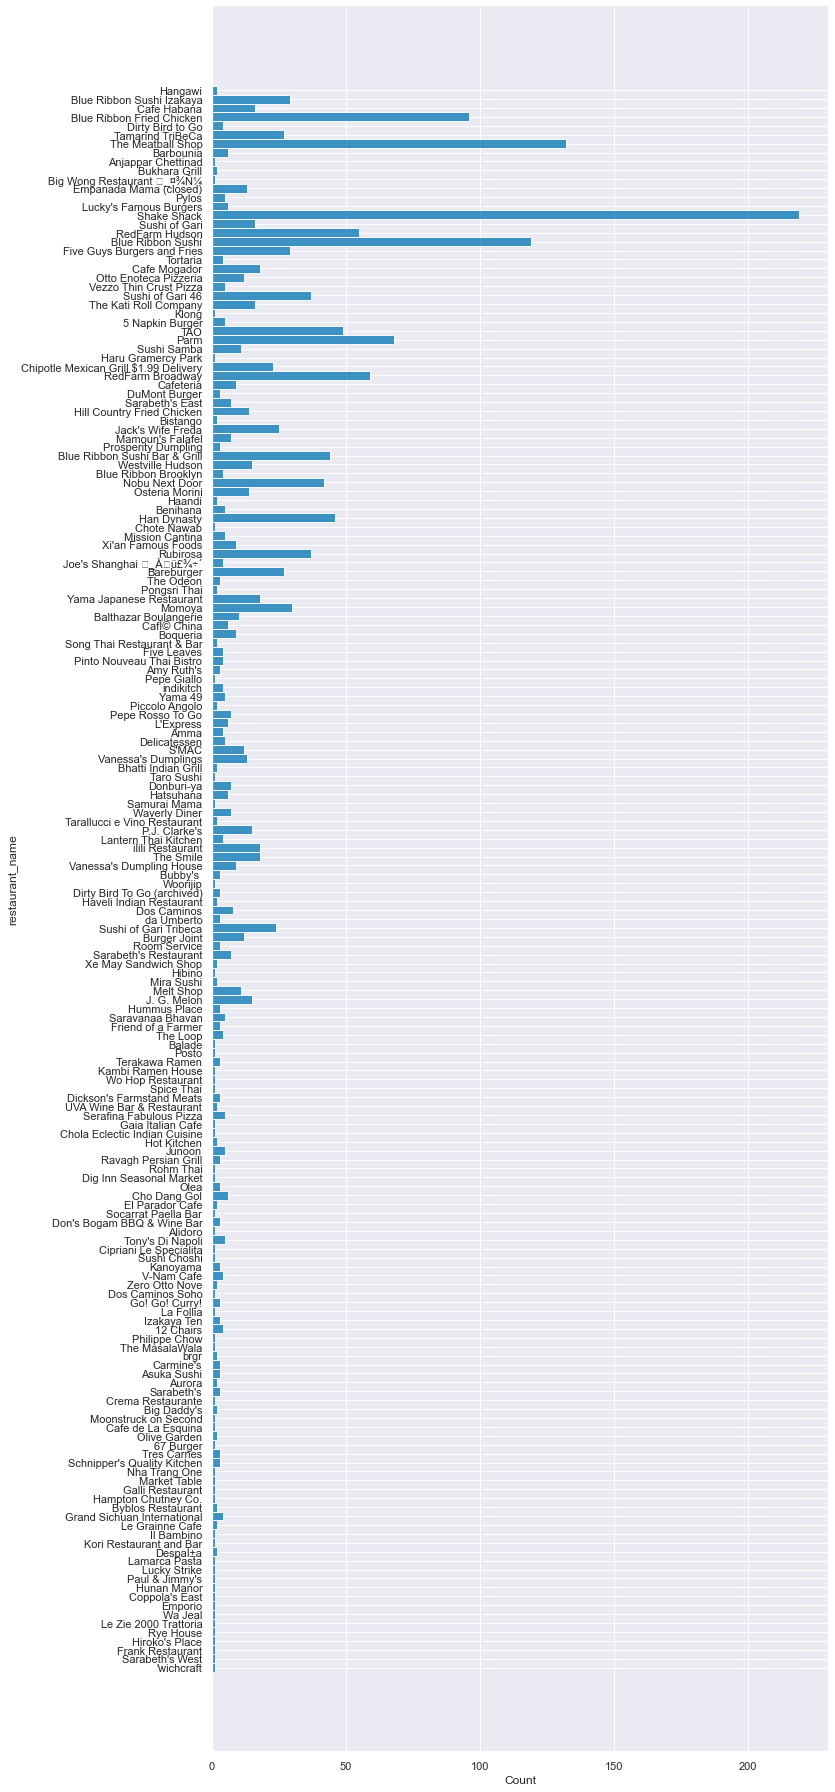

In [9]:
# presentation of categorical variable through a histogram
sns.displot(df, y='restaurant_name', height=25, aspect=11.7/25)

There are some clear favorites: Shake Shack, The Meatball Shop, Blue Ribbon Sushi are on the podium. Clearly, some restaurants get the bulk of the orders.

#### cuisine_type: we will see which types of cuisines are more enjoyed than others.

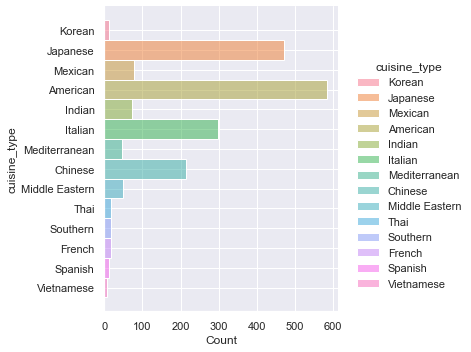

In [10]:
# presentation of categorical variable through a histogram
sns.displot(df, y='cuisine_type', hue='cuisine_type')

We clearly notice that the three favorite cuisine types are in descending order:
1. American
2. Japanese
3. Italian

#### cost_of_the_order: we will see how the price of the orders are distributed. 

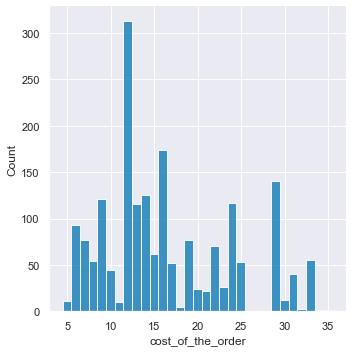

In [11]:
# presentation of numerical variable through a histogram
sns.displot(df, x='cost_of_the_order', binwidth=1)

#### day_of_the_week: we will view the number of orders placed on weekdays and weekends

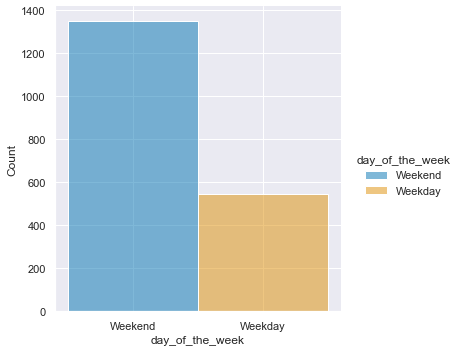

In [12]:
# presentation of categorical variable through a histogram
sns.displot(df, x='day_of_the_week', hue='day_of_the_week', binwidth=15)

#### rating: we will see how well the orders are rated by the customers.

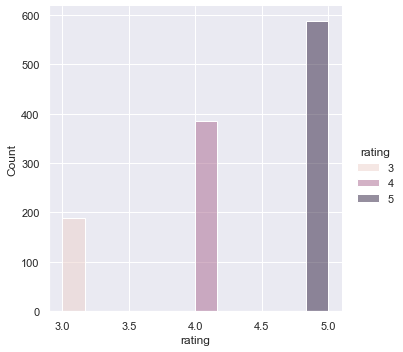

In [13]:
# first we remove the orders without a rating
dfratinggiven = df[df.rating != 0]

# then we can plot the data
sns.displot(dfratinggiven, x='rating', hue='rating')

#### food_preparation_time: we will see how long it takes for the restaurant to prepare the orders.

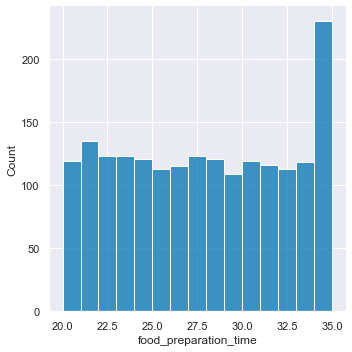

In [14]:
# presentation of numerical variable through a histogram
sns.displot(df, x='food_preparation_time', binwidth=1)

#### delivery_time: we will see how the different delivery times are distributed.

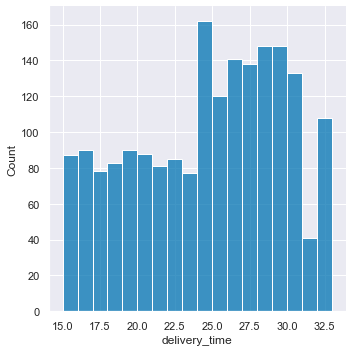

In [15]:
# presentation of numerical variable through a histogram
sns.displot(df, x='delivery_time', binwidth=1) #presentation through a histogram

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [16]:
df['restaurant_name'].value_counts()[0:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: Int64

#### Observations:
As we can see, some restaurants clearly have a very high number of orders. Shake Shack alone represents more than 10% of orders on its own.

### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [17]:
# first we will remove the weekday orders
dfweekend = df[df.day_of_the_week == 'Weekend']

# we will count the observations to be able to draw conclusions
weekend_shape = dfweekend.shape
print('\nNumber of rows :', weekend_shape[0]) #print the number of rows

# then we can find the most popular cuisine
dfweekend['cuisine_type'].value_counts()[0:1]


Number of rows : 1351


American    415
Name: cuisine_type, dtype: Int64

#### Observations:
We can conclude that American is the favorite style on weekends with 415 orders out of 1351 orders, almost 31% of the orders.

### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [18]:
print(df['cost_of_the_order'][df['cost_of_the_order'] > 20].count(),"orders")
print((df['cost_of_the_order'][df['cost_of_the_order'] > 20].count())*100/shape[0],"%")

555 orders
29.24130663856691 %


#### Observations:
As we can see, there were 555 orders representing 29% that cost more than 20 dollars.

### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [19]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean delivery time is about 24 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [20]:
# we start by identifying the entry
print("Entry with highest order:",df['cost_of_the_order'].argmax())
print("Customer ID of the person who placed highest order:", df.iloc[573]['customer_id'])

Entry with highest order: 573
Customer ID of the person who placed highest order: 62359


#### Observations:
The Customer ID of the person who placed the highest order is Number 62359.

### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the important variables in the dataset. (7 marks)

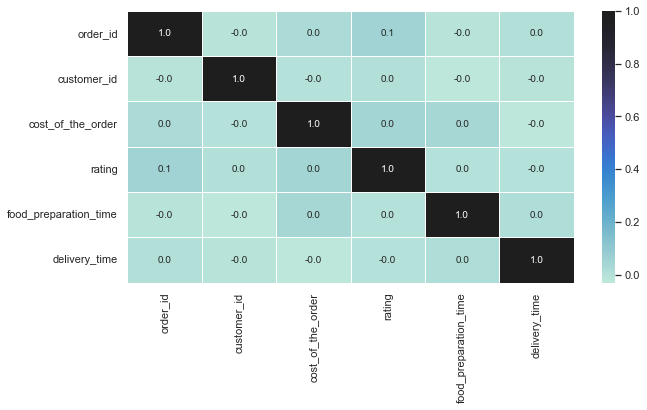

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

#### Observations
I'm afraid I fail to see the potential correlations. I would have expected at least a correlation between the ratings and the total preparation time (because a customer that waits too much would not put a good rating but that does not seem to be the case).

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [22]:
# out of curiosity, let's start by counting the number of restaurants in the data set
df['restaurant_name'].nunique()

178

In [23]:
# we start by filtering the data frame to keep only the two columns we care about: the restaurant name and the ratings.
dfpromotion = dfratinggiven.loc[:, ['restaurant_name', 'rating']]

# we aggregate the ratings of each restaurant and average them
dfpromorating = dfpromotion.groupby("restaurant_name").agg(**{'average_rating': pd.NamedAgg(column='rating', aggfunc=np.mean)})

# we filter the restaurants to keep only the ones who have an average rating exceeding 4
dfpromoratingfiltered = dfpromorating[dfpromorating.average_rating > 4]

# now we aggregate the number of ratings of each restaurant
dfpromocount = dfpromotion.groupby("restaurant_name").agg(**{'reviews_count': pd.NamedAgg(column='rating', aggfunc=sum)})

# we filter the restaurants to keep only the ones who have more than 50 reviews
dfpromocountfiltered = dfpromocount[dfpromocount.reviews_count > 50]

# we finish with an innerjoin on the filtered tables
merged_dfpromo = pd.merge(left=dfpromoratingfiltered, right = dfpromocountfiltered, 
                          left_on = 'restaurant_name', right_on = 'restaurant_name')
merged_dfpromo.info()
merged_dfpromo

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, Bareburger to ilili Restaurant
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  25 non-null     float64
 1   reviews_count   25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0+ bytes


,average_rating,reviews_count
restaurant_name,,
Bareburger,4.058824,69
Blue Ribbon Fried Chicken,4.328125,277
Blue Ribbon Sushi,4.219178,308
Blue Ribbon Sushi Bar & Grill,4.590909,101
Blue Ribbon Sushi Izakaya,4.333333,78
Cafe Mogador,4.153846,54
Chipotle Mexican Grill $1.99 Delivery,4.200000,63
Five Guys Burgers and Fries,4.555556,82
Han Dynasty,4.434783,102


#### Observations:
There is a total of 25 restaurants out of 178 in the dataset that qualify for the promotion. 
However, it should be noted that more than 110 restaurants had an average rating exceeding 4 which shows a high level of satisfaction from our clients.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [24]:
# first let's sum the cost of the orders above 20 dollars
cost20 = df['cost_of_the_order'][df['cost_of_the_order'] > 20].sum()

# then the orders between 5 and 20 dollars
cost5 = df['cost_of_the_order'][df['cost_of_the_order'] > 5].sum() - cost20

revenue = (cost20 * 0.25) + (cost5 * 0.5)

# and we calculate the net revenue
print(revenue)

11947.3125


#### Observations:
The total revenue made by FoodHub on the orders in the dataset is 11947 dollars.

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [25]:
# we start by adding a column to the data frame that is the sum of the two variables.
df['total_order_time'] =  df[['food_preparation_time', 'delivery_time']].sum(axis=1)

# we then count the number of observations in this new column that are above 60 minutes
orders60 = df['total_order_time'][df['total_order_time'] > 60].count()

# and finally we calculate the percentage of orders
orders60*100 / shape[0]

10.53740779768177

#### Observations:
10.53% of orders have a total delivery time above 60 minutes. 

### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [26]:
df.groupby('day_of_the_week').mean()[['delivery_time']]

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The deliveries are clearly quicker on the weekends, around 22 minutes, compared to 28 minutes on weekdays. Traffic most likely has an impact on the delivery time.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights:
The key insights I would like to stress are the following:
1. The number of missing ratings on restaurants is very important. This should be addressed through incentives given to clients to provide their reviews.
2. There is a strong concentration of certain restaurants. Is it worth it to keep on the roster restaurants with a negligible number of orders? Or should we find ways to promote them to increase the number of orders.
3. A non-negligible number of orders have a very minimal value. Our revenue is proportional to the order amount so this is not an issue for us but rather for the restaurants.